In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


C:\Users\Saurav\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Saurav\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Saurav\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
pd.set_option('display.max_columns',450)
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
y=train['TARGET']
train=train.drop('TARGET',axis=1)

In [5]:
rf=RandomForestClassifier()
rf.fit(train,y)

C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
feat_imp=pd.DataFrame(rf.feature_importances_,columns=['importance']).sort_values('importance',ascending=False)
feat_imp['feature']=train.columns
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.sort_values(by='importance',inplace=True)
feat_imp.drop(feat_imp[feat_imp['importance']<0.01].index,inplace=True)

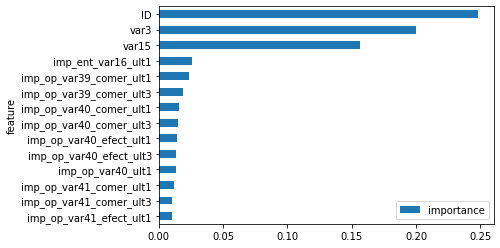

In [7]:
feat_imp.plot(kind='barh')

In [8]:
clf=XGBClassifier()
clf.fit(train,y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [9]:
feat_imp1=pd.DataFrame({'importance': clf.feature_importances_})
feat_imp1['features']=train.columns
feat_imp1=feat_imp1.set_index('features',drop=True).sort_values(by='importance',ascending=False)
feat_imp1=feat_imp1.drop(feat_imp1[feat_imp1['importance']<0.01].index)

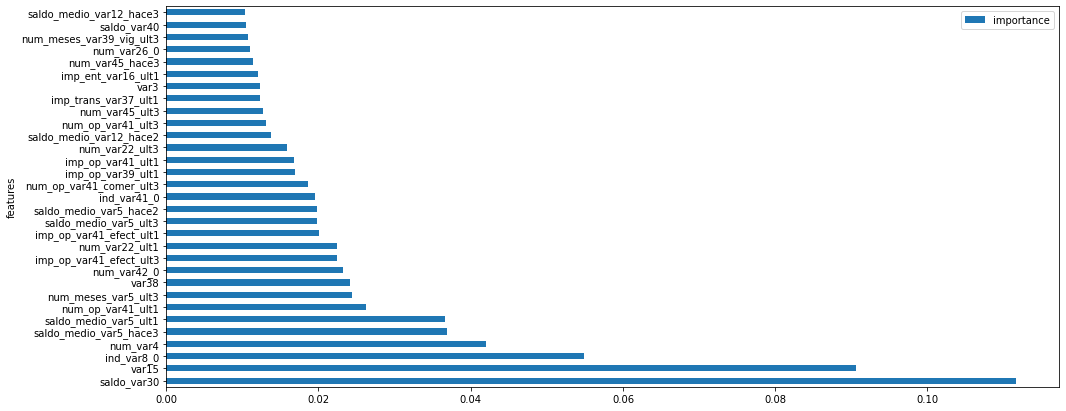

In [10]:
feat_imp1.plot(kind='barh',figsize=(16,7))

In [11]:
y.value_counts()[0]/len(train)

0.9604314654038411

In [12]:
train['TARGET']=y

In [13]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [14]:
train.loc[train['var3']==-999999,'var3']=2
train['var3'].value_counts()[:20]

2     74281
8       138
9       110
3       108
1       105
13       98
7        97
4        86
12       85
6        82
0        75
10       72
11       66
5        63
14       61
15       34
18       10
16        9
23        7
17        7
Name: var3, dtype: int64

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


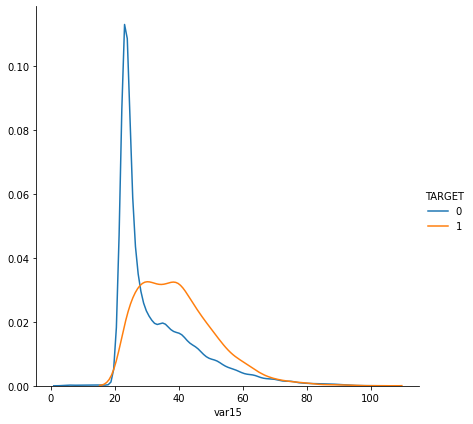

In [15]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


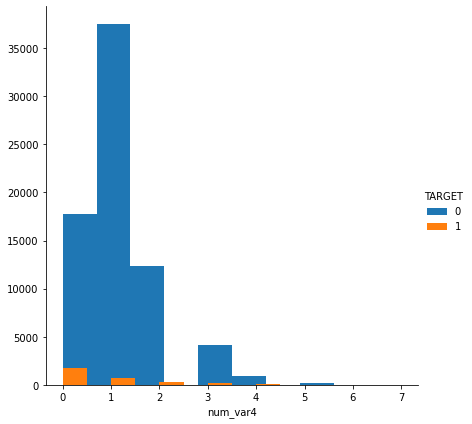

In [16]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(plt.hist, "num_var4") \
   .add_legend()

In [17]:
train['var38'].value_counts()
df=train[train['var38']!=117310.979016]['var38']

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00, 8.0000e+00,
        1.2000e+01, 2.5000e+01, 3.3000e+01, 4.5000e+01, 5.2000e+01,
        8.5000e+01, 1.0300e+02, 1.6700e+02, 1.8400e+02, 2.6000e+02,
        3.9000e+02, 4.7600e+02, 6.9700e+02, 9.7900e+02, 1.1730e+03,
        1.6050e+03, 1.9210e+03, 2.3050e+03, 2.6800e+03, 3.1060e+03,
        3.2910e+03, 3.6510e+03, 3.5790e+03, 3.5620e+03, 3.5760e+03,
        3.3860e+03, 3.2440e+03, 1.7815e+04, 2.7490e+03, 2.3130e+03,
        2.1110e+03, 1.7320e+03, 1.5860e+03, 1.2680e+03, 1.0670e+03,
        9.2500e+02, 7.3800e+02, 5.3500e+02, 4.9600e+02, 3.6200e+02,
        3.2100e+02, 2.7700e+02, 2.2900e+02, 1.8000e+02, 1.5000e+02,
        1.1100e+02, 6.8000e+01, 6.3000e+01, 5.9000e+01, 3.6000e+01,
        3.2000e+01, 3.5000e+01, 3.3000e+01, 2.8000e+01, 1.3000e+01,
        6.0000e+00, 1.1000e+01, 3.0000e+00, 8.0000e+00, 3.0000e+00,
        6.0000e+00, 1.0000e+00, 3.0000e+00, 5.00

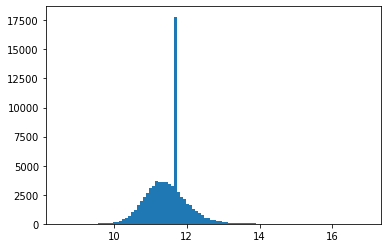

In [18]:
plt.hist(np.log(df),bins=100)

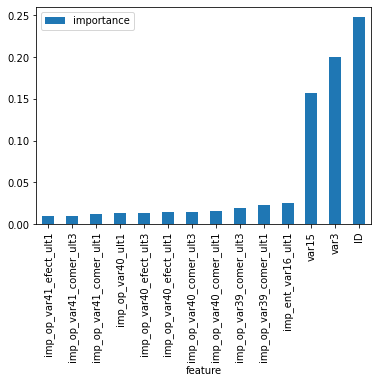

In [19]:
feat_imp.plot(kind='bar')

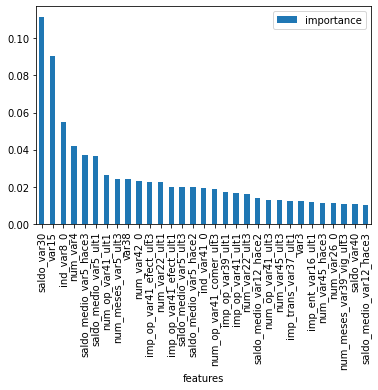

In [20]:
feat_imp1.plot(kind='bar')

In [21]:
train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [22]:
train['var38']

0         39205.170000
1         49278.030000
2         67333.770000
3         64007.970000
4        117310.979016
             ...      
76015     60926.490000
76016    118634.520000
76017     74028.150000
76018     84278.160000
76019    117310.979016
Name: var38, Length: 76020, dtype: float64

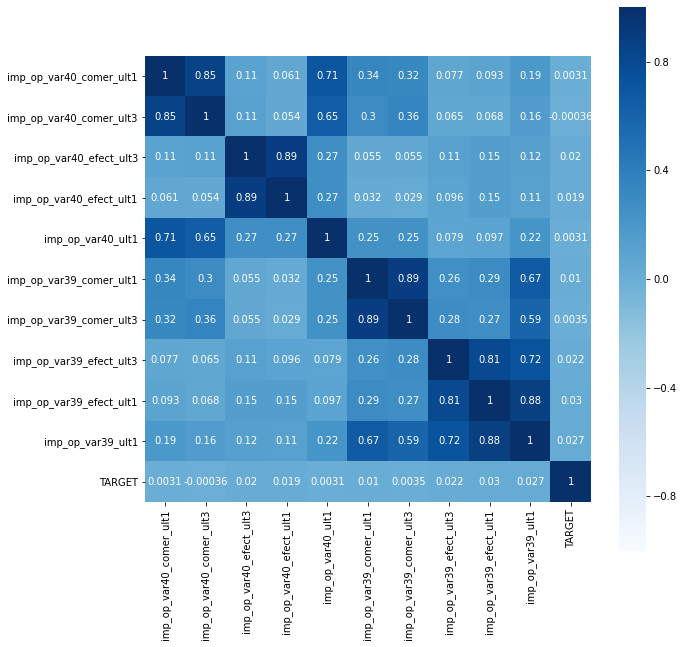

In [23]:
cols=['imp_op_var40_comer_ult1','imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult3','imp_op_var40_efect_ult1','imp_op_var40_ult1',
     'imp_op_var39_comer_ult1','imp_op_var39_comer_ult3', 'imp_op_var39_efect_ult3','imp_op_var39_efect_ult1','imp_op_var39_ult1','TARGET']
plt.figure(figsize=(10,10))
mat=train[cols].corr()
sns.heatmap(mat,annot=True,square=True,vmax=1,vmin=-1,cmap='Blues')

In [28]:
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=0)
Xtrain=train.copy()
Xtrain.drop('TARGET',axis=1,inplace=True)

In [30]:
sel.fit(Xtrain)
sum(sel.get_support())

336

In [33]:
[x for x in Xtrain.columns if x not in Xtrain.columns[sel.get_support()]]

['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3']

In [34]:
Xtrain=sel.transform(Xtrain)

In [35]:
Xtest=test.copy()

In [36]:
Xtest=sel.transform(Xtest)

In [37]:
sel1=VarianceThreshold(threshold=0.001)
sel1.fit(Xtrain)
sum(sel1.get_support())

301

In [59]:
Xtrain=train.copy()
Xtrain=Xtrain.drop('TARGET',axis=1)

In [62]:
cols=[x for x in Xtrain.columns if x not in Xtrain.columns[sel.get_support()]]
Xtrain.drop(cols,axis=1,inplace=True)

In [63]:
rf=RandomForestClassifier(n_estimators=50)
rf.fit(Xtrain,y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
feat=pd.DataFrame({'columns':Xtrain.columns,'importance':rf.feature_importances_})
feat.sort_values(by='importance')
feat.set_index('columns',drop=True)
plt.figure()


,columns,importance
0,ID,2.506762e-01
1,var3,2.222972e-03
2,var15,1.499642e-01
3,imp_ent_var16_ult1,2.579267e-03
4,imp_op_var39_comer_ult1,3.135764e-03
...,...,...
331,saldo_medio_var44_hace2,1.190753e-05
332,saldo_medio_var44_hace3,2.005157e-09
333,saldo_medio_var44_ult1,3.442334e-05
334,saldo_medio_var44_ult3,1.692011e-05


<Figure size 432x288 with 0 Axes>

In [76]:
feat=feat.set_index('columns',drop=True).sort_values(by='importance',ascending=False)

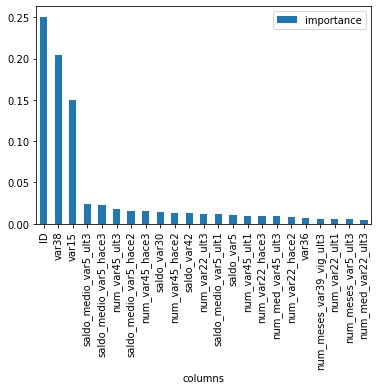

In [79]:
feat.drop(feat[feat['importance']<0.005].index).plot(kind='bar')

In [80]:
clf=XGBClassifier?

In [81]:
clf=XGBClassifier(max_depth=6)
clf.fit(Xtrain,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [84]:
feat=pd.DataFrame({'columns':Xtrain.columns,'importance':rf.feature_importances_})
feat=feat.set_index('columns',drop=True).sort_values(by='importance',ascending=False)
feat[:10]

,importance
columns,
ID,0.250676
var38,0.204016
var15,0.149964
saldo_medio_var5_ult3,0.024485
saldo_medio_var5_hace3,0.022960
num_var45_ult3,0.018374
saldo_medio_var5_hace2,0.015941
num_var45_hace3,0.015081
saldo_var30,0.014547
